# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [2]:
!pip install --quiet openpyxl
df = pd.read_excel('richpeople.xlsx')
df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,...,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
1649,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,...,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
1650,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,...,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
1651,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,...,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape

(1653, 30)

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [4]:
df.sort_values('networthusbillion', ascending = False).head(10)
df['name'].head(10)

0            A. Jerrold Perenchio
1              Abdulla Al Futtaim
2    Abdulla bin Ahmad Al Ghurair
3               Abdullah Al Rajhi
4                Abdulsamad Rabiu
5                 Abigail Johnson
6         Abilio dos Santos Diniz
7                   Achmad Hamami
8                      Adi Godrej
9        Aerin Lauder Zinterhofer
Name: name, dtype: object

## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [5]:
male = df[df['gender']== 'male']
female = df[df['gender'] =='female']
len(male) -len(female)

1293

## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [6]:
len(male) / (len(male) + len(female))*100


89.11070780399274

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [7]:
df.groupby('gender')['networthusbillion'].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5a) What is the most common source/type of wealth?

In [8]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [9]:
df['sourceofwealth'].value_counts().reset_index().head(1)

,sourceofwealth,count
0,real estate,107


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [10]:
df.groupby('gender')['typeofwealth'].value_counts()

gender  typeofwealth            
female  inherited                   142
        founder non-finance          21
        executive                     6
        self-made finance             6
        privatized and resources      5
male    founder non-finance         446
        inherited                   364
        self-made finance           338
        privatized and resources    187
        executive                   136
Name: count, dtype: int64

## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [11]:
df['company'].value_counts().head(5)

company
Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: count, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

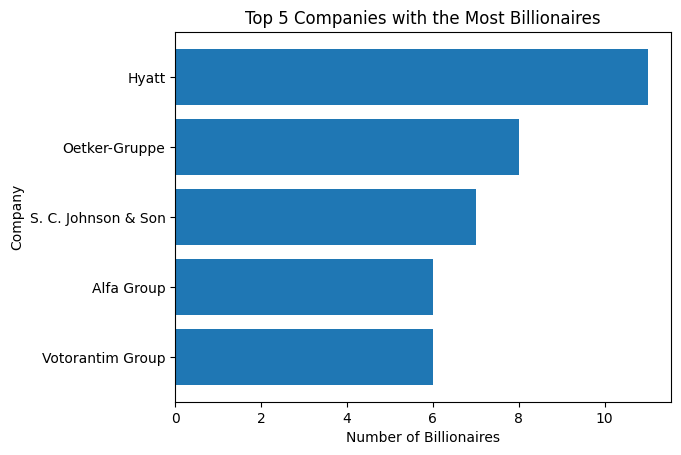

In [12]:
import matplotlib.pyplot as plt

top_companies = df['company'].value_counts().head()
plt.barh(top_companies.index, top_companies.values)

plt.xlabel('Number of Billionaires')
plt.ylabel('Company')
plt.title('Top 5 Companies with the Most Billionaires')
plt.gca().invert_yaxis()
plt.show()

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df.colname == 'A') | (df.colname == 'B')`
> - `df.colname.isin(['A', 'B'])`

In [13]:
top_5 = top_companies.sort_values().head(5).tolist()
sum(top_5)


38

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [14]:
top_10 = df['countrycode'].value_counts().head(10)
top_10

countrycode
USA    499
CHN    152
RUS    111
DEU     85
BRA     65
IND     56
GBR     47
HKG     45
FRA     43
ITA     35
Name: count, dtype: int64

## 9a) How old is an average billionaire?

In [15]:
df['age'].mean()

63.34213836477988

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [16]:
df.groupby('selfmade')['age'].mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [17]:
df['age'].sort_values().head(1)
print(df['name'][0])

A. Jerrold Perenchio


In [18]:
df['age'].sort_values().tail(64)
print(df['name'][343])

David Rockefeller, Sr.


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

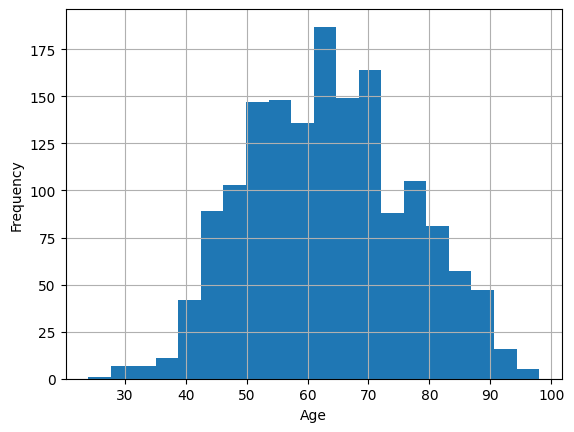

In [19]:
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

In [20]:
!pip install --quiet altair

import altair as alt

scatter = alt.Chart(df).mark_circle().encode(
    x='age',
    y='networthusbillion',
    tooltip=['name', 'age', 'networthusbillion']
).properties(
    width=600,
    height=400
)

scatter

alt.Chart(...)

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

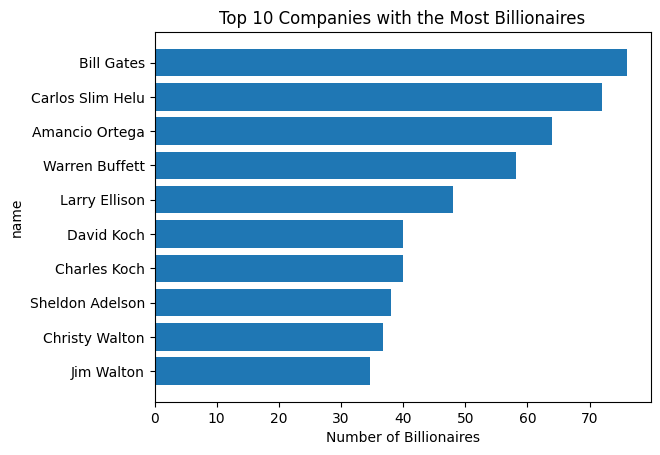

In [34]:
top_10 = top_10 = df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending=False).head(10)
top_10

plt.barh(top_10['name'], top_10['networthusbillion'])

plt.xlabel('Number of Billionaires')
plt.ylabel('name')
plt.title('Top 10 Companies with the Most Billionaires')
plt.gca().invert_yaxis()
plt.show()



## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [37]:
pd.read_json('billionaires.json')


,commonName,commonLastName,citizenship,slug,industry,personId,rank,worth,lastChange,lastPercentChange,ytdChange,ytdPercentChange,sector,fWorth,fLastChange,fYtdChange,fLastPercentChange,fYtdPercentChange
0,Elon Musk,Musk,United States,elon-r-musk,Technology,1954518,1,221116780866,9795811154,4.64,84106712938,61.39,Technology,$221B,+$9.80B,+$84.1B,+4.6%,+61.4%
1,Bernard Arnault,Arnault,France,bernard-j-arnault,Consumer,1392853,2,170267873036,7356040557,4.52,8178459368,5.05,Consumer,$170B,+$7.36B,+$8.18B,+4.5%,+5.0%
2,Jeff Bezos,Bezos,United States,jeffrey-p-bezos,Technology,1642252,3,169556171871,3202661603,1.93,62599942079,58.53,Technology,$170B,+$3.20B,+$62.6B,+1.9%,+58.5%
3,Bill Gates,Gates,United States,william-h-gates,Technology,1390479,4,131137012631,1103482475,0.85,21900118029,20.05,Technology,$131B,+$1.10B,+$21.9B,+0.8%,+20.1%
4,Larry Ellison,Ellison,United States,lawrence-j-ellison,Technology,1491757,5,129608081535,2286642464,1.80,37780140594,41.14,Technology,$130B,+$2.29B,+$37.8B,+1.8%,+41.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Sofie Kirk Kristiansen,Kristiansen,Denmark,sofie-kirk-k-kristiansen,Consumer,17992920,496,5145062341,33748968,0.66,-292738682,-5.38,Consumer,$5.15B,+$33.7M,-$293M,+0.7%,-5.4%
496,Frits Goldschmeding,Goldschmeding,Netherlands,frits-j-goldschmeding,Retail,3368283,497,5136282642,154239727,3.10,-7773499,-0.15,Retail,$5.14B,+$154M,-$7.77M,+3.1%,-0.1%
497,Austen Cargill,Cargill,United States,austen-s-cargill,Commodities,1878644,498,5132489050,0,0.00,38448500,0.75,Commodities,$5.13B,$0,+$38.4M,0%,+0.8%
498,John Reece,Reece,United Kingdom,john-reece,Industrial,18070530,499,5125353358,0,0.00,1839914334,56.00,Industrial,$5.13B,$0,+$1.84B,0%,+56.0%


In [ ]:
plt.barh(top_10.index, top_10.values)

plt.xlabel('Number of Billionaires')
plt.ylabel('name')
plt.title('Top 10 Companies with the Most Billionaires')
plt.gca().invert_yaxis()
plt.show()